In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import rfit
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree

In [2]:
sharedf = pd.read_csv('/Users/manishatherupalli/Desktop/ML FINAL PROJECT/Dataset/OnlineNewsPopularity_Viz.csv')
print(sharedf.head())

                                                 url  timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...      731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...      731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...      731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...      731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/      731.0   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  ...  \
0                  0.815385        4.0             2.0       1.0  ...   
1     

In [3]:
 print(len(sharedf))

39644


In [4]:
sharedf=sharedf.drop_duplicates()
print(sharedf.isna().sum())

url                             0
timedelta                       0
n_tokens_title                  0
n_tokens_content                0
n_unique_tokens                 0
                               ..
abs_title_sentiment_polarity    0
shares                          0
target                          0
Data_Channel                    0
Publish_DOW                     0
Length: 64, dtype: int64


In [5]:
sharedf.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,target
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184,0.493442
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749,0.499963
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,0.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000,0.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000,0.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000,1.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000,1.000000


In [6]:
sharedf = sharedf[sharedf['timedelta']>21]

In [7]:
sharedf = sharedf[sharedf['n_tokens_content']!=0]
#The n_tokens_title and n_tokens_content columns which contains the 
# value 0 is removed

In [8]:
print(len(sharedf))
#After removing these 0 values, the length of the dataframe is 37906.
#1180 rows are removed and the dataset is stored.

37906


In [9]:
print(sharedf['shares'].mean())
print(sharedf['shares'].median())

3366.584551258376
1400.0


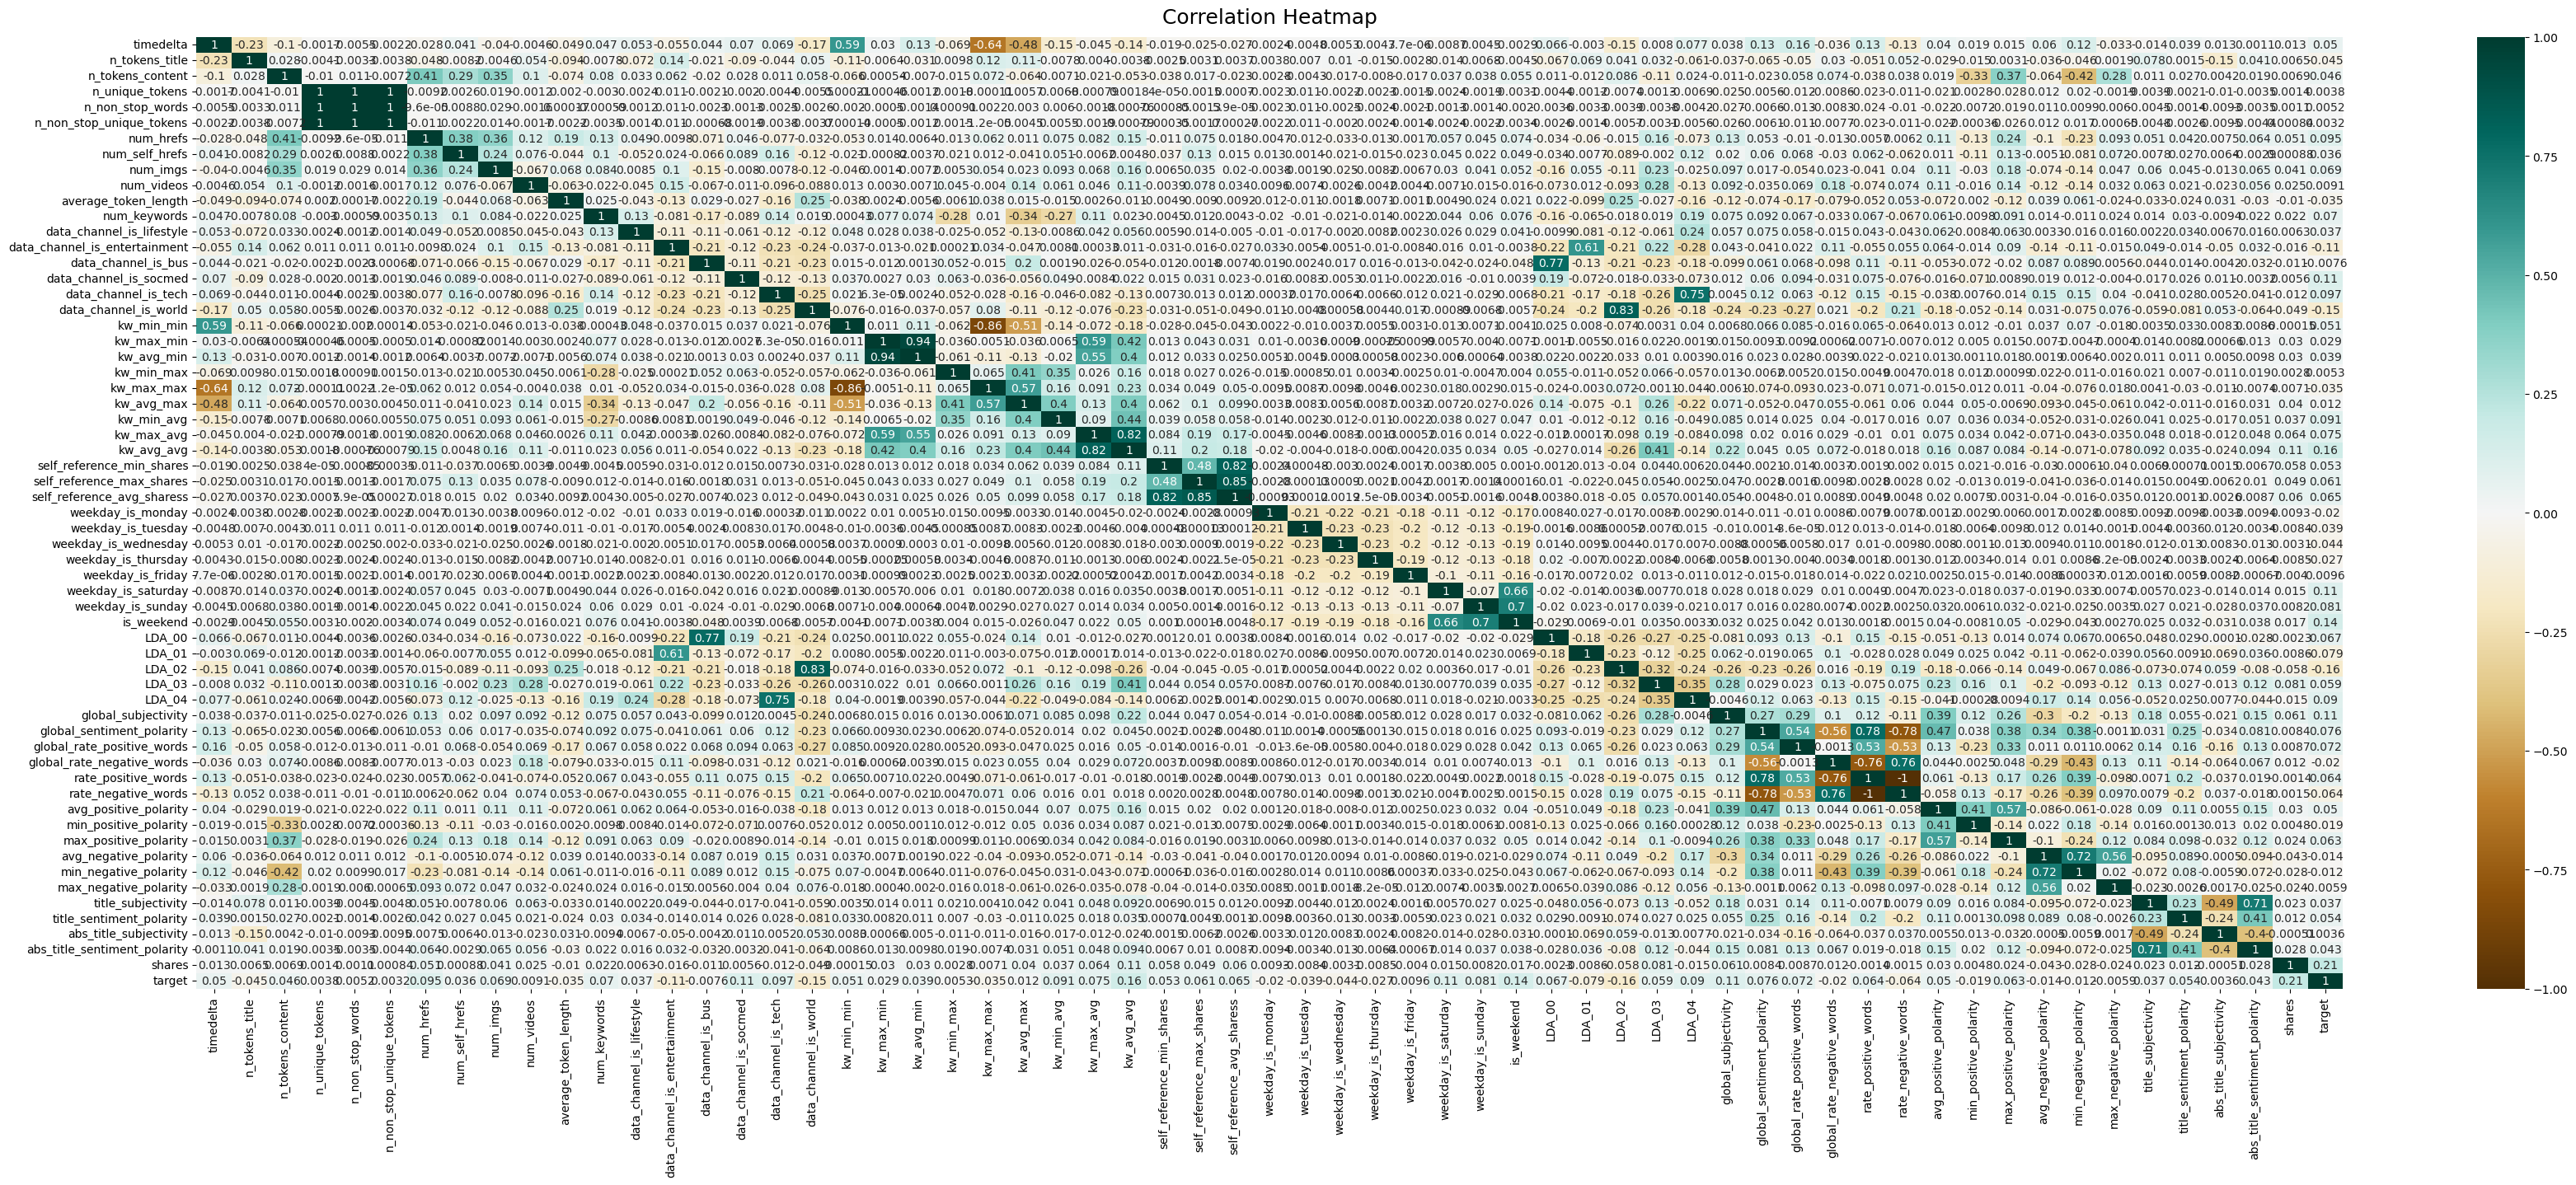

In [10]:
#correlation between the columns
plt.figure(figsize=(42, 15))
heatmap = sns.heatmap(sharedf.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);


In [11]:
# Choosing 0.7 as the threshold, any correlation value greater than this will be removed.
sharedf = sharedf.drop('url',axis=1)

In [12]:
sharedf= sharedf.drop(["n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min",'self_reference_max_shares', 'self_reference_min_shares','kw_avg_avg', 'LDA_00','LDA_02', 'LDA_04', 'is_weekend', 'rate_positive_words', 'rate_negative_words', 'min_negative_polarity',"title_subjectivity" ,'timedelta'],axis=1)

In [13]:
print(sharedf.head())

   n_tokens_title  n_tokens_content  n_unique_tokens  num_hrefs  \
0            12.0             219.0         0.663594        4.0   
1             9.0             255.0         0.604743        3.0   
2             9.0             211.0         0.575130        3.0   
3             9.0             531.0         0.503788        9.0   
4            13.0            1072.0         0.415646       19.0   

   num_self_hrefs  num_imgs  num_videos  average_token_length  num_keywords  \
0             2.0       1.0         0.0              4.680365           5.0   
1             1.0       1.0         0.0              4.913725           4.0   
2             1.0       1.0         0.0              4.393365           6.0   
3             0.0       1.0         0.0              4.404896           7.0   
4            19.0      20.0         0.0              4.682836           7.0   

   data_channel_is_lifestyle  ...  max_positive_polarity  \
0                        0.0  ...                    0.7   
1 

In [14]:
num_cols = sharedf.select_dtypes(['int64','float64']).columns

for column in num_cols:    
    q1 = sharedf[column].quantile(0.25)    # First Quartile
    q3 = sharedf[column].quantile(0.75)    # Third Quartile
    IQR = q3 - q1                            # Inter Quartile Range

    llimit = q1 - 1.5*IQR                       # Lower Limit
    ulimit = q3 + 1.5*IQR                        # Upper Limit

    outliers = sharedf[(sharedf[column] < llimit) | (sharedf[column] > ulimit)]
    print('Number of outliers in "' + column + '" : ' + str(len(outliers)))
    print(llimit)
    print(ulimit)
    print(IQR)

Number of outliers in "n_tokens_title" : 147
4.5
16.5
3.0
Number of outliers in "n_tokens_content" : 1860
-444.5
1431.5
469.0
Number of outliers in "n_unique_tokens" : 477
0.2762936290371248
0.8126974720421252
0.1341009607512501
Number of outliers in "num_hrefs" : 2601
-8.5
27.5
9.0
Number of outliers in "num_self_hrefs" : 2058
-3.5
8.5
3.0
Number of outliers in "num_imgs" : 7402
-3.5
8.5
3.0
Number of outliers in "num_videos" : 2915
-1.5
2.5
1.0
Number of outliers in "average_token_length" : 549
3.9488069213925012
5.4074600332125
0.36466327795499964
Number of outliers in "num_keywords" : 50
1.5
13.5
3.0
Number of outliers in "data_channel_is_lifestyle" : 2045
0.0
0.0
0.0
Number of outliers in "data_channel_is_entertainment" : 6770
0.0
0.0
0.0
Number of outliers in "data_channel_is_bus" : 6172
0.0
0.0
0.0
Number of outliers in "data_channel_is_socmed" : 2294
0.0
0.0
0.0
Number of outliers in "data_channel_is_tech" : 7259
0.0
0.0
0.0
Number of outliers in "data_channel_is_world" : 7938


In [15]:
from numpy import percentile
#num_cols = sharedf.select_dtypes(['int64','float64']).columns
cols = list(sharedf.columns)
l = ['data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','data_channel_is_world','weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday','weekday_is_saturday','weekday_is_sunday','LDA_01','LDA_03','shares','target','Data_Channel','Publish_DOW']
for i in l:
    cols.remove(i)

In [16]:
for i in cols:
    
    Q1 = sharedf[i].quantile(0.25)
    Q2 = sharedf[i].quantile(0.75)
    iqr = Q2-Q1
    lower_band = Q1 - 1.5*iqr
    upper_band = Q2 + 1.5*iqr
    sharedf[i] = sharedf[i].clip(lower = lower_band, upper = upper_band)

In [17]:
for column in cols:    
    q1 = sharedf[column].quantile(0.25)    # First Quartile
    q3 = sharedf[column].quantile(0.75)    # Third Quartile
    IQR = q3 - q1                            # Inter Quartile Range

    llimit = q1 - 1.5*IQR                       # Lower Limit
    ulimit = q3 + 1.5*IQR                        # Upper Limit

    outliers = sharedf[(sharedf[column] < llimit) | (sharedf[column] > ulimit)]
    print('Number of outliers in "' + column + '" : ' + str(len(outliers)))
    print(llimit)
    print(ulimit)
    print(IQR)

Number of outliers in "n_tokens_title" : 0
4.5
16.5
3.0
Number of outliers in "n_tokens_content" : 0
-444.5
1431.5
469.0
Number of outliers in "n_unique_tokens" : 0
0.2762936290371248
0.8126974720421252
0.1341009607512501
Number of outliers in "num_hrefs" : 0
-8.5
27.5
9.0
Number of outliers in "num_self_hrefs" : 0
-3.5
8.5
3.0
Number of outliers in "num_imgs" : 0
-3.5
8.5
3.0
Number of outliers in "num_videos" : 0
-1.5
2.5
1.0
Number of outliers in "average_token_length" : 0
3.9488069213925012
5.4074600332125
0.36466327795499964
Number of outliers in "num_keywords" : 0
1.5
13.5
3.0
Number of outliers in "kw_min_min" : 0
-8.5
11.5
5.0
Number of outliers in "kw_max_min" : 0
-385.0
1831.0
554.0
Number of outliers in "kw_min_max" : 0
-11550.0
19250.0
7700.0
Number of outliers in "kw_max_max" : 0
843300.0
843300.0
0.0
Number of outliers in "kw_avg_max" : 0
-63828.57142749999
560857.1428565
156171.428571
Number of outliers in "kw_min_avg" : 0
-3046.461206895
5077.435344825
2030.974137929999

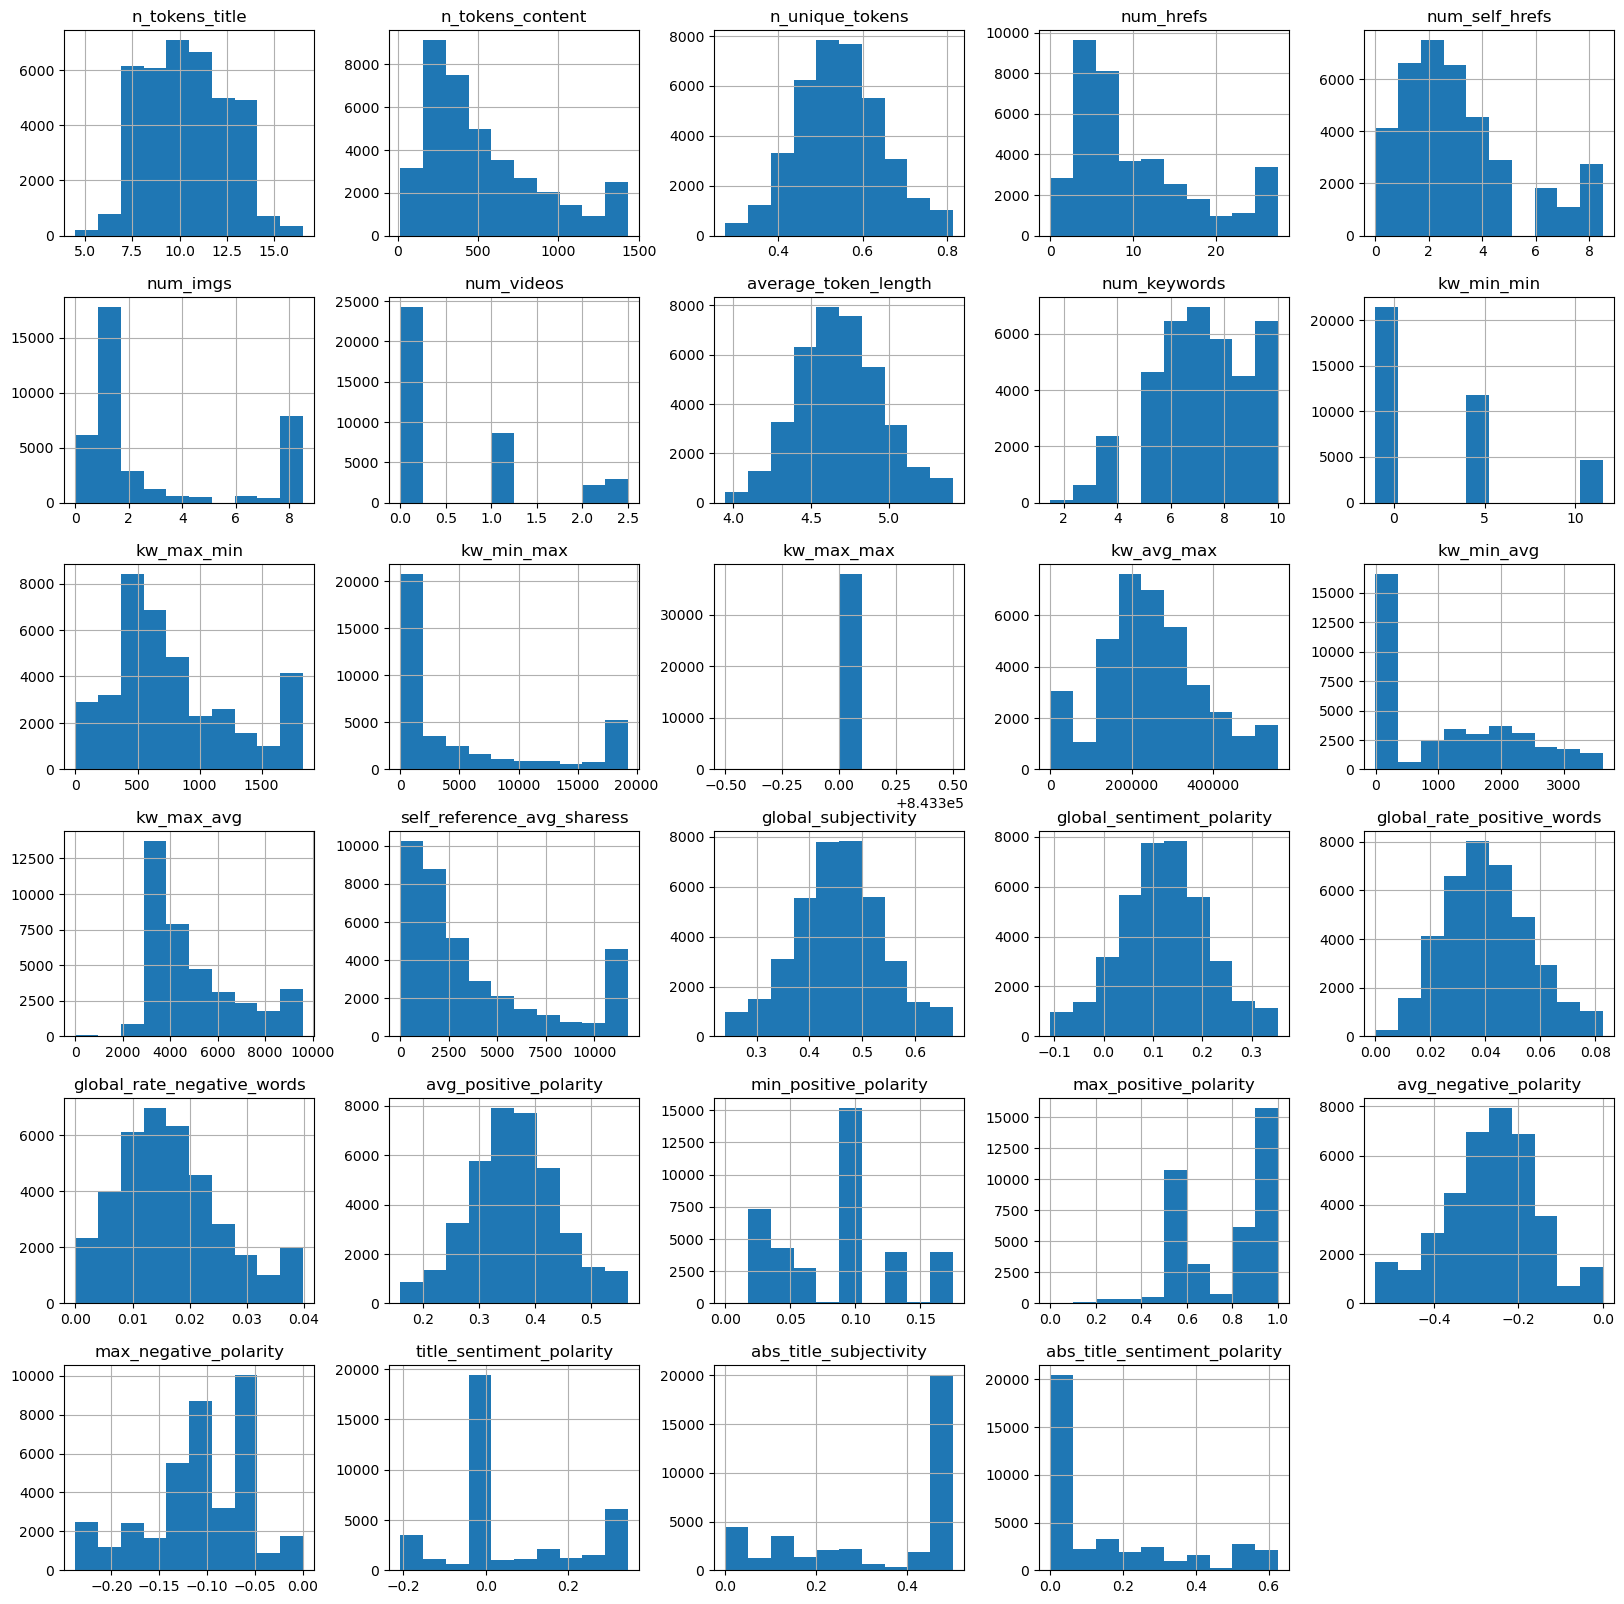

In [18]:
sharedf1 = sharedf[cols]

sharedf1.hist(figsize=(20,20))
plt.show()

In [19]:
#First we build a Logistic Regression using stats model using all the features available to us
import statsmodels.api as sm
from statsmodels.formula.api import glm
log_reg = glm(formula = "target ~ n_tokens_title+n_tokens_content+n_unique_tokens+num_hrefs+num_self_hrefs+num_imgs+num_videos+average_token_length+num_keywords+kw_min_min+kw_max_min+kw_min_max+kw_max_max+kw_avg_max+kw_min_avg+kw_max_avg+self_reference_avg_sharess+global_subjectivity+global_sentiment_polarity+global_rate_positive_words+global_rate_negative_words+avg_positive_polarity+min_positive_polarity+max_positive_polarity+avg_negative_polarity+max_negative_polarity+title_sentiment_polarity+abs_title_subjectivity+abs_title_sentiment_polarity+C(Publish_DOW)+C(Data_Channel)", data = sharedf, family=sm.families.Binomial()).fit()
print(log_reg.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                37906
Model:                            GLM   Df Residuals:                    37866
Model Family:                Binomial   Df Model:                           39
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23883.
Date:                Tue, 25 Apr 2023   Deviance:                       47767.
Time:                        10:16:09   Pearson chi2:                 3.82e+04
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1183
Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [20]:
# Sorting the variables by their p-values
coefs = pd.DataFrame({
    'coef': log_reg.params.values,
    'odds ratio': np.exp(log_reg.params.values),
    'pvalue': log_reg.pvalues,
    'name': log_reg.params.index
}).sort_values(by='pvalue', ascending=False)
print(coefs)

                                          coef  odds ratio         pvalue  \
n_tokens_title                    4.441812e-04    1.000444   9.357154e-01   
global_rate_negative_words        3.244296e-01    1.383241   8.738126e-01   
n_tokens_content                 -3.328727e-05    0.999967   5.919153e-01   
global_rate_positive_words        6.566453e-01    1.928313   5.878560e-01   
max_positive_polarity            -4.461127e-02    0.956369   5.740867e-01   
global_sentiment_polarity         1.951904e-01    1.215542   5.466369e-01   
Intercept                        -7.047737e-10    1.000000   5.157197e-01   
avg_negative_polarity             1.626375e-01    1.176610   2.980420e-01   
avg_positive_polarity            -2.733430e-01    0.760832   2.802696e-01   
abs_title_sentiment_polarity      8.260409e-02    1.086112   2.481242e-01   
kw_min_max                        5.054859e-06    1.000005   1.231300e-01   
kw_avg_max                       -2.284386e-07    1.000000   9.719239e-02   

In [21]:
#Running the stats model after removing non-significant predictors
log_reg1 = glm(formula = "target ~ n_unique_tokens+num_hrefs+num_self_hrefs+num_imgs+num_videos+average_token_length+num_keywords+kw_min_min+kw_max_min+kw_max_max+kw_min_avg+kw_max_avg+self_reference_avg_sharess+global_subjectivity+min_positive_polarity+max_negative_polarity+title_sentiment_polarity+abs_title_subjectivity+C(Publish_DOW)+C(Data_Channel)", data = sharedf, family=sm.families.Binomial()).fit()
print(log_reg1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                37906
Model:                            GLM   Df Residuals:                    37877
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23891.
Date:                Tue, 25 Apr 2023   Deviance:                       47781.
Time:                        10:16:30   Pearson chi2:                 3.82e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1180
Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [22]:
ctoc = pd.DataFrame(coefs[coefs['pvalue']<0.05].index)
print(ctoc)

                                   0
0                       num_keywords
1              max_negative_polarity
2       C(Data_Channel)[T.Lifestyle]
3                         kw_max_max
4               average_token_length
5           C(Publish_DOW)[T.Monday]
6                    n_unique_tokens
7             abs_title_subjectivity
8                         kw_max_min
9              min_positive_polarity
10                        kw_min_avg
11          title_sentiment_polarity
12        C(Publish_DOW)[T.Thursday]
13       C(Publish_DOW)[T.Wednesday]
14         C(Publish_DOW)[T.Tuesday]
15                          num_imgs
16                         num_hrefs
17                        num_videos
18               global_subjectivity
19     C(Data_Channel)[T.Technology]
20                        kw_min_min
21                    num_self_hrefs
22          C(Publish_DOW)[T.Sunday]
23          C(Data_Channel)[T.World]
24   C(Data_Channel)[T.Social Media]
25        C(Publish_DOW)[T.Saturday]
2

/Users/manishatherupalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       0.61      0.71      0.66      5715
           1       0.65      0.55      0.60      5657

    accuracy                           0.63     11372
   macro avg       0.63      0.63      0.63     11372
weighted avg       0.63      0.63      0.63     11372



<AxesSubplot:>

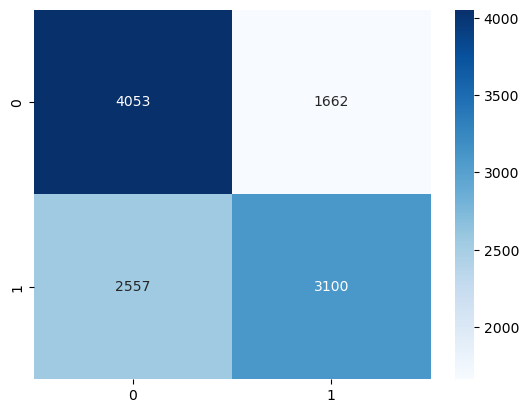

In [23]:
## KNN Classification
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

X = sharedf.drop(['shares','target','Publish_DOW','Data_Channel'],axis=1)
y = sharedf['target']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)
scaler = StandardScaler()
Scaled_Xtrain = scaler.fit_transform(X_train)
Scaled_Xtest= scaler.transform(X_test)
knn_model = KNeighborsClassifier(n_neighbors=19)
knn_model.fit(Scaled_Xtrain,y_train)
y_pred = knn_model.predict(Scaled_Xtest)
accuracy_score(y_test,y_pred)
cf_matrix = confusion_matrix(y_test,y_pred)

print(classification_report(y_test,y_pred))
import seaborn as sns
sns.heatmap(cf_matrix, annot=True,cmap='Blues', fmt='g')

In [24]:
#Choosing K value
test_error_rates = []


In [25]:
for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(Scaled_Xtrain,y_train) 
   
    y_pred_test = knn_model.predict(Scaled_Xtest)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

/Users/manishatherupalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/manishatherupalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the val

Text(0.5, 0, 'K Value')

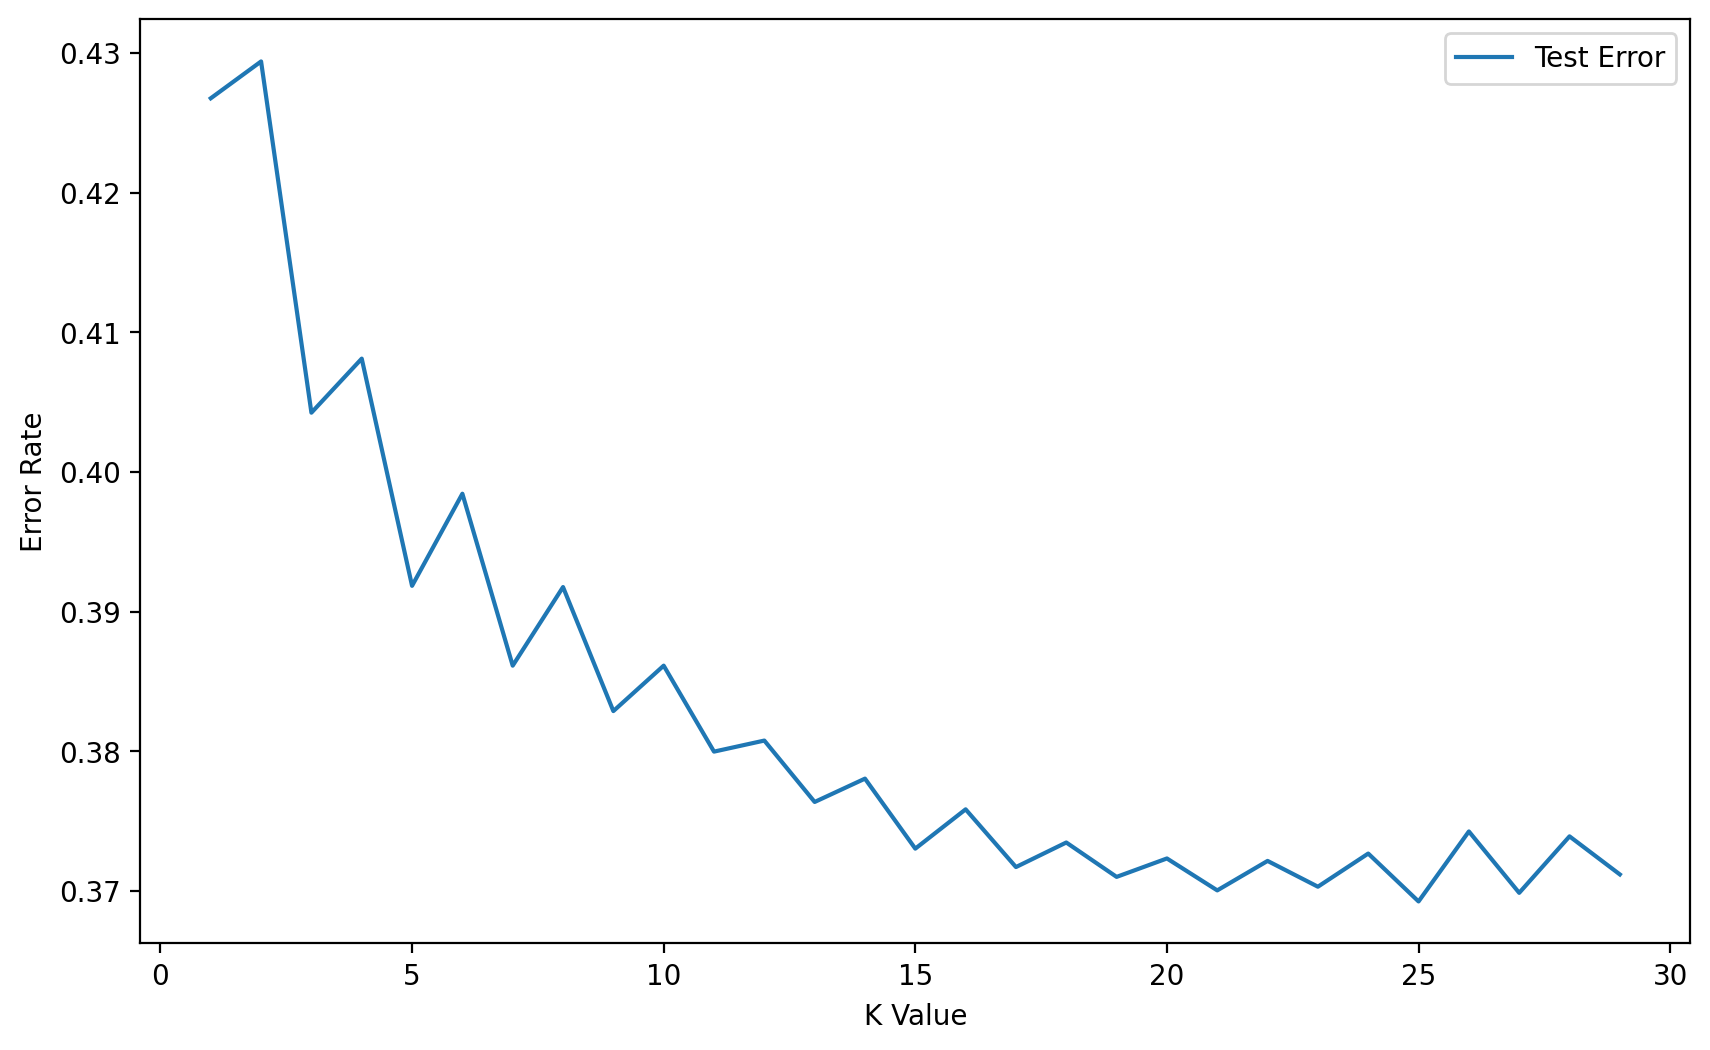

In [26]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

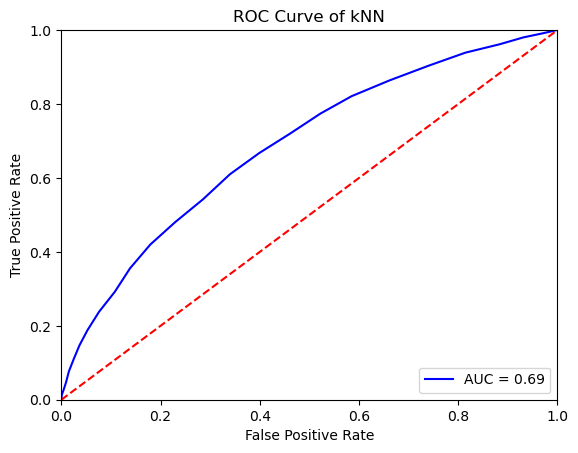

In [27]:
# Plotting ROC for KNN
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_scores=knn_model.predict_proba(Scaled_Xtest)
fpr,tpr,threshold =roc_curve(y_test,y_scores[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

              precision    recall  f1-score   support

           0       0.64      0.68      0.66      5715
           1       0.65      0.60      0.63      5657

    accuracy                           0.64     11372
   macro avg       0.64      0.64      0.64     11372
weighted avg       0.64      0.64      0.64     11372

                        Attribute  Importance
22     self_reference_avg_sharess       0.260
21                     kw_max_avg       0.248
28            weekday_is_saturday       0.213
29              weekday_is_sunday       0.158
12         data_channel_is_socmed       0.150
13           data_channel_is_tech       0.110
3                       num_hrefs       0.099
15                     kw_min_min       0.094
6                      num_videos       0.089
32            global_subjectivity       0.083
5                        num_imgs       0.080
41       title_sentiment_polarity       0.076
20                     kw_min_avg       0.069
17                     kw_min

/Users/manishatherupalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


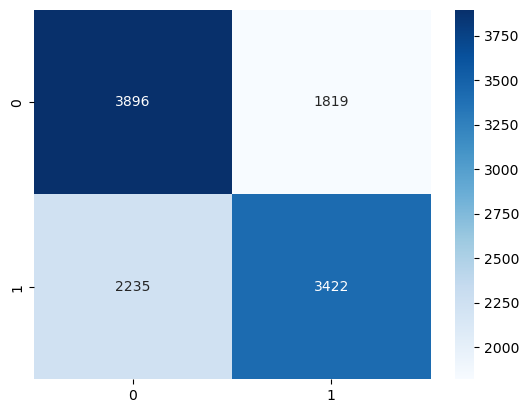

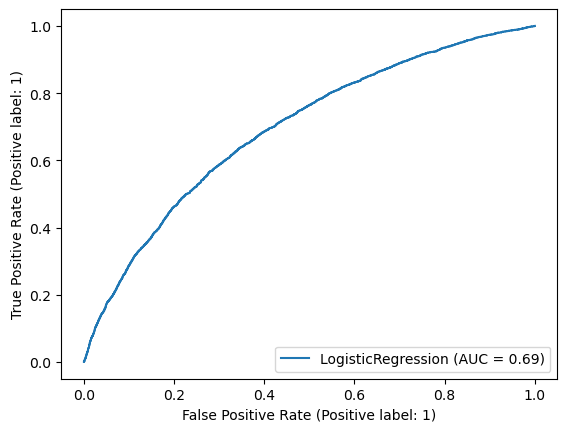

In [28]:
# # Running Logistic Regression again from the Sklearn library now.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import plot_roc_curve
log_model = LogisticRegression()
log_model.fit(Scaled_Xtrain,y_train)
y_pred = log_model.predict(Scaled_Xtest)
accuracy_score(y_test,y_pred)
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True,cmap='Blues', fmt='g')
print(classification_report(y_test,y_pred))
plot_roc_curve(log_model,Scaled_Xtest,y_test)
#%%
importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': log_model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
print(importances.head(100))

              precision    recall  f1-score   support

           0       0.63      0.62      0.63      5715
           1       0.62      0.63      0.62      5657

    accuracy                           0.62     11372
   macro avg       0.62      0.62      0.62     11372
weighted avg       0.62      0.62      0.62     11372

[0.         0.00430226 0.00938994 0.01309509 0.         0.00578359
 0.         0.         0.         0.         0.13328362 0.
 0.         0.11493324 0.11880719 0.04474765 0.         0.
 0.         0.         0.01902414 0.29140283 0.12154862 0.
 0.         0.         0.         0.         0.05565868 0.02011549
 0.00123273 0.         0.         0.01753516 0.         0.00355238
 0.         0.02558738 0.         0.         0.         0.
 0.         0.        ]


<Figure size 2400x1600 with 0 Axes>

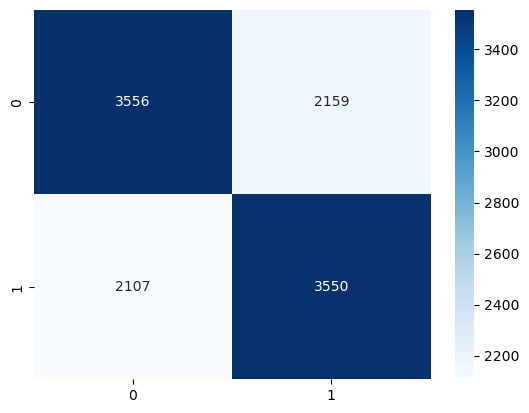

<Figure size 2400x1600 with 0 Axes>

In [29]:
## Running the Decision Tree classificatier now
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

model = DecisionTreeClassifier(max_depth=5)
model.fit(Scaled_Xtrain,y_train)
base_pred = model.predict(Scaled_Xtest)
from sklearn.metrics import confusion_matrix,classification_report
cf_matrix = confusion_matrix(y_test,base_pred)
sns.heatmap(cf_matrix, annot=True,cmap='Blues', fmt='g')
print(classification_report(y_test,base_pred))
print(model.feature_importances_)
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])
plt.figure(figsize=(12,8),dpi=200)

[Text(0.5, 0.9166666666666666, 'kw_max_avg <= -0.66\ngini = 0.5\nsamples = 26534\nvalue = [13542, 12992]'),
 Text(0.25, 0.75, 'data_channel_is_tech <= 0.779\ngini = 0.466\nsamples = 9416\nvalue = [5934, 3482]'),
 Text(0.125, 0.5833333333333334, 'kw_min_min <= 1.365\ngini = 0.428\nsamples = 6831\nvalue = [4709, 2122]'),
 Text(0.0625, 0.4166666666666667, 'self_reference_avg_sharess <= -0.576\ngini = 0.401\nsamples = 5628\nvalue = [4063, 1565]'),
 Text(0.03125, 0.25, 'global_sentiment_polarity <= -0.422\ngini = 0.346\nsamples = 2873\nvalue = [2235, 638]'),
 Text(0.015625, 0.08333333333333333, 'gini = 0.299\nsamples = 1462\nvalue = [1195, 267]'),
 Text(0.046875, 0.08333333333333333, 'gini = 0.388\nsamples = 1411\nvalue = [1040, 371]'),
 Text(0.09375, 0.25, 'global_sentiment_polarity <= -0.097\ngini = 0.447\nsamples = 2755\nvalue = [1828, 927]'),
 Text(0.078125, 0.08333333333333333, 'gini = 0.412\nsamples = 1637\nvalue = [1162, 475]'),
 Text(0.109375, 0.08333333333333333, 'gini = 0.482\nsam

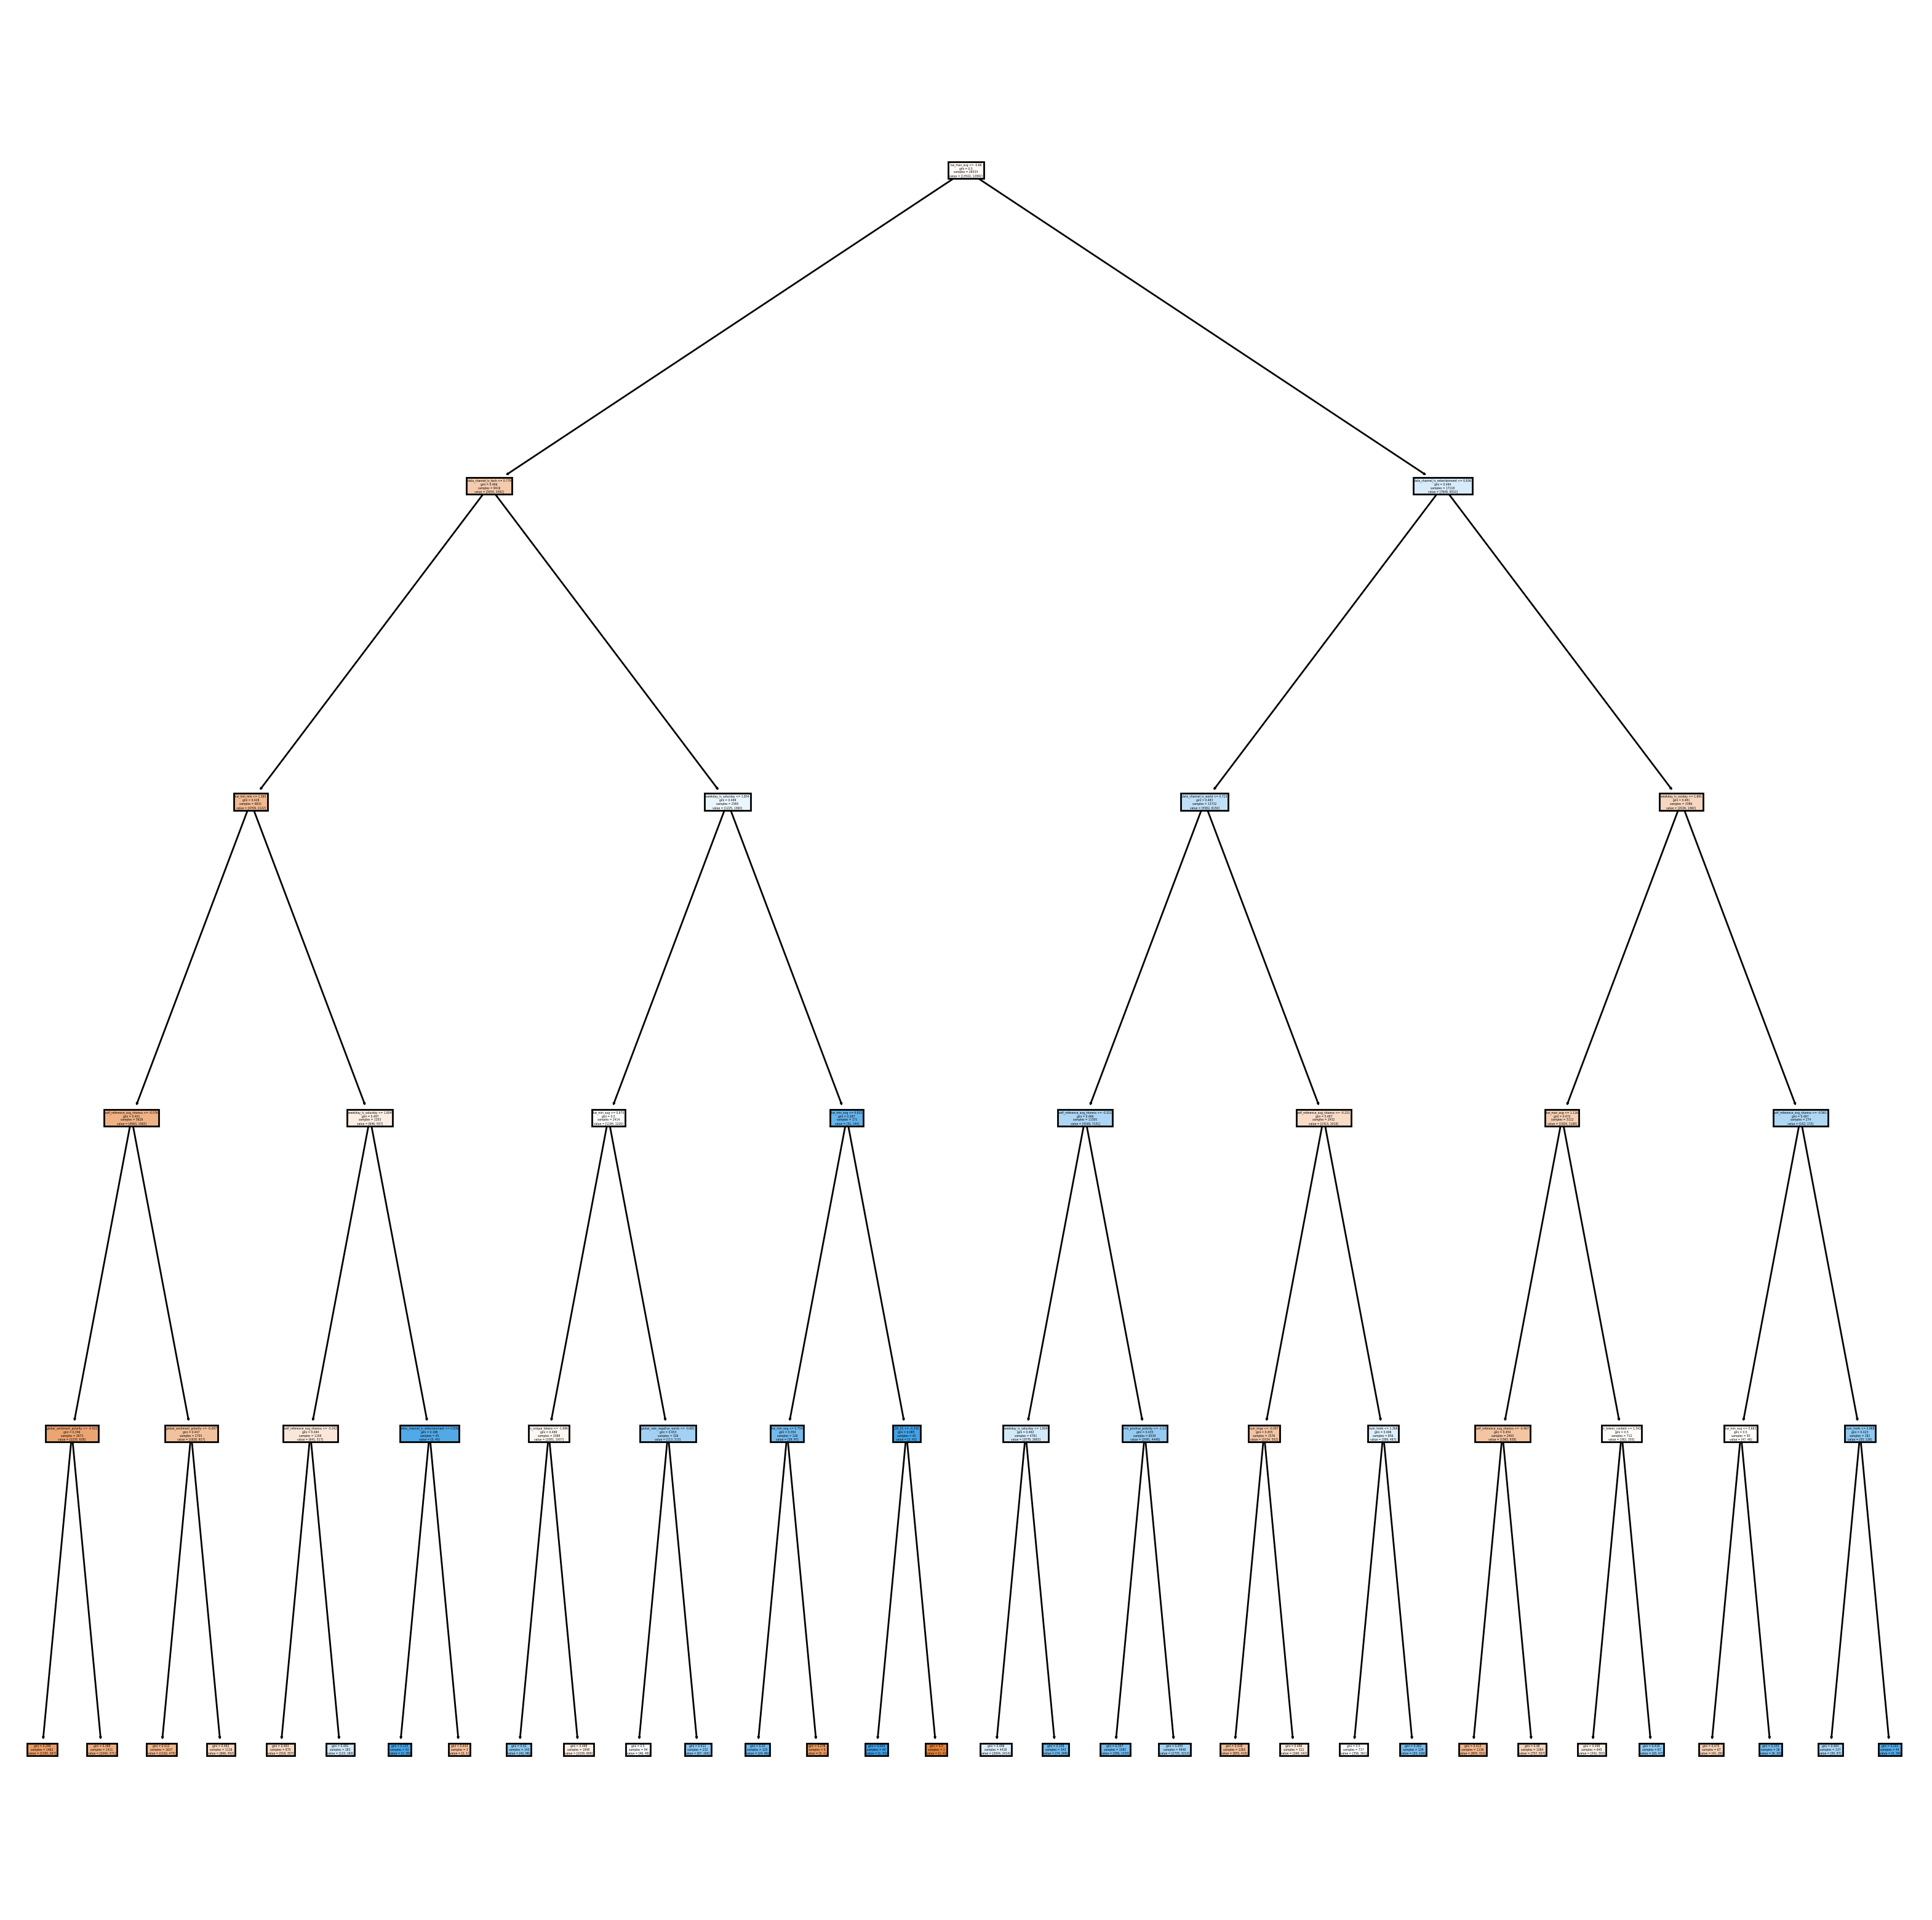

In [30]:
plt.figure(figsize = (20,20), dpi = 200)
plot_tree(model,filled=True,feature_names=X.columns)

In [31]:
dff = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance', ascending=False)
print(dff.head(17))

                               Feature Importance
kw_max_avg                                  0.291
data_channel_is_entertainment               0.133
self_reference_avg_sharess                  0.122
data_channel_is_world                       0.119
data_channel_is_tech                        0.115
weekday_is_saturday                         0.056
kw_min_min                                  0.045
min_positive_polarity                       0.026
weekday_is_sunday                           0.020
kw_min_avg                                  0.019
global_sentiment_polarity                   0.018
num_hrefs                                   0.013
n_unique_tokens                             0.009
num_imgs                                    0.006
n_tokens_content                            0.004
global_rate_negative_words                  0.004
LDA_01                                      0.001


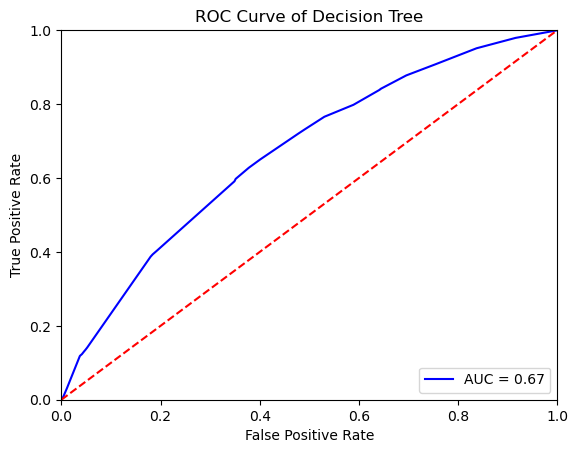

In [32]:
#ROC for decision tree
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_scores=model.predict_proba(Scaled_Xtest)
fpr,tpr,threshold =roc_curve(y_test,y_scores[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Decision Tree')
plt.show()

In [33]:
#PRUNING 
#Pruned decision tree
pruned_tree_1 = DecisionTreeClassifier(max_depth=2)
pruned_tree_1.fit(Scaled_Xtrain,y_train)
print(classification_report(y_test,base_pred))
dff = pd.DataFrame(index=X.columns,data=pruned_tree_1.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance', ascending=False)
print(dff.head(17))
#%%
pruned_tree_2 = DecisionTreeClassifier(max_leaf_nodes=2)
pruned_tree_2.fit(Scaled_Xtrain,y_train)
print(classification_report(y_test,base_pred))
dff = pd.DataFrame(index=X.columns,data=pruned_tree_2.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance', ascending=False)
print(dff.head(17))

              precision    recall  f1-score   support

           0       0.63      0.62      0.63      5715
           1       0.62      0.63      0.62      5657

    accuracy                           0.62     11372
   macro avg       0.62      0.62      0.62     11372
weighted avg       0.62      0.62      0.62     11372

                               Feature Importance
kw_max_avg                                  0.528
data_channel_is_entertainment               0.252
data_channel_is_tech                        0.220
n_tokens_title                              0.000
global_sentiment_polarity                   0.000
weekday_is_thursday                         0.000
weekday_is_friday                           0.000
weekday_is_saturday                         0.000
weekday_is_sunday                           0.000
LDA_01                                      0.000
LDA_03                                      0.000
global_subjectivity                         0.000
global_rate_positive_wo

In [34]:
for depth in range(2, 25):
 
    model_dc = DecisionTreeClassifier(max_depth=depth, random_state=101)
    model_dc.fit(Scaled_Xtrain,y_train)
 
    preds = model_dc.predict(Scaled_Xtest)
 
    print(f'{depth} accuracy score: {accuracy_score(y_test, preds)}')

2 accuracy score: 0.6081603939500527
3 accuracy score: 0.6167780513542033
4 accuracy score: 0.6223179739711572
5 accuracy score: 0.6248680970805487
6 accuracy score: 0.6254836440379881
7 accuracy score: 0.6271544143510376
8 accuracy score: 0.6267147379528667
9 accuracy score: 0.6230214562082308
10 accuracy score: 0.615722827998593
11 accuracy score: 0.609655293703834
12 accuracy score: 0.6086000703482237
13 accuracy score: 0.6025325360534647
14 accuracy score: 0.6074569117129792
15 accuracy score: 0.5960253253605347
16 accuracy score: 0.5970805487161449
17 accuracy score: 0.5919803024973619
18 accuracy score: 0.5845937390080901
19 accuracy score: 0.5804607808652832
20 accuracy score: 0.574393246570524
21 accuracy score: 0.5761519521632079
22 accuracy score: 0.574832922968695
23 accuracy score: 0.5777347871966233
24 accuracy score: 0.573425958494548


              precision    recall  f1-score   support

           0       0.64      0.69      0.66      5715
           1       0.66      0.62      0.64      5657

    accuracy                           0.65     11372
   macro avg       0.65      0.65      0.65     11372
weighted avg       0.65      0.65      0.65     11372



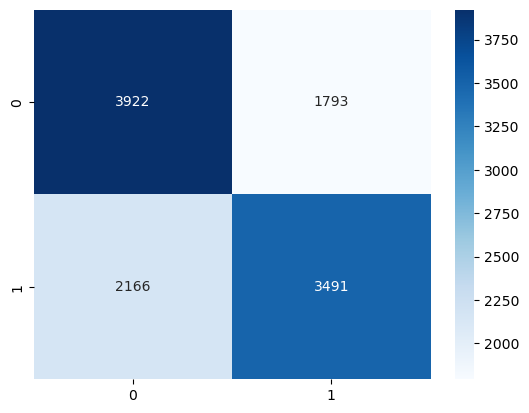

In [40]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

modelforrc = RandomForestClassifier(n_estimators=100,max_features='auto',random_state=101)
modelforrc.fit(Scaled_Xtrain,y_train)
preds = modelforrc.predict(Scaled_Xtest)
cff = confusion_matrix(y_test,preds)
sns.heatmap(cff, annot=True,cmap='Blues', fmt='g')
print(classification_report(y_test,preds))


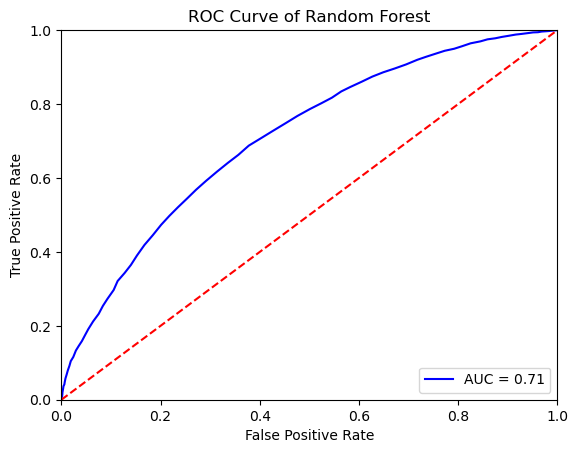

In [36]:
#ROC for Random Forest
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_scores=modelforrc.predict_proba(Scaled_Xtest)
fpr,tpr,threshold =roc_curve(y_test,y_scores[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random Forest')
plt.show()

              precision    recall  f1-score   support

           0       0.65      0.67      0.66      5715
           1       0.65      0.64      0.65      5657

    accuracy                           0.65     11372
   macro avg       0.65      0.65      0.65     11372
weighted avg       0.65      0.65      0.65     11372



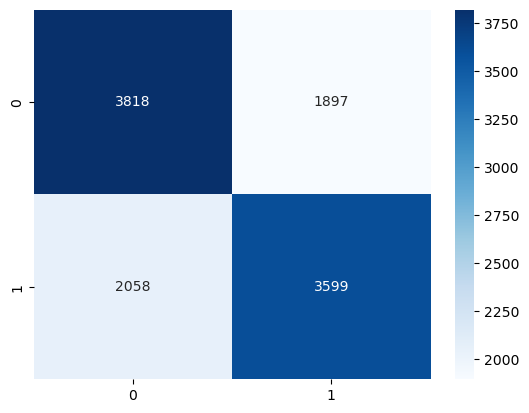

In [39]:
#Support Vector Machine
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
svc = SVC(C= 1, class_weight='balanced',probability=True)
svc.fit(Scaled_Xtrain,y_train)
preds = svc.predict(Scaled_Xtest)
cff = confusion_matrix(y_test,preds)
sns.heatmap(cff, annot=True,cmap='Blues', fmt='g')
print(classification_report(y_test,preds))

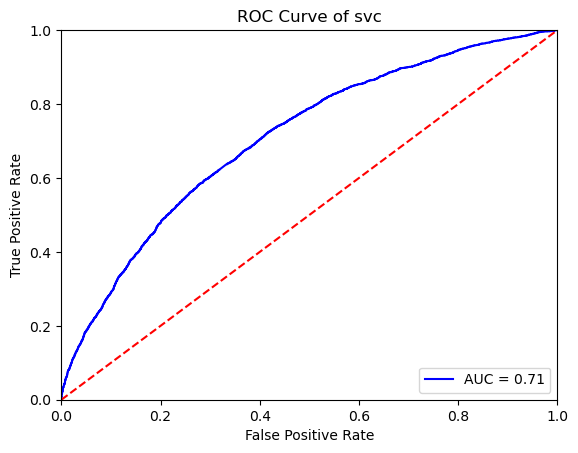

In [38]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_scores=svc.predict_proba(Scaled_Xtest)
fpr,tpr,threshold =roc_curve(y_test,y_scores[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of svc')
plt.show()